## Gold, Microsoft, and Amazon

In [24]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import numpy as np
import hvplot.pandas
import hvplot.dask 

In [25]:
# Load .env environment variables
load_dotenv()

True

In [26]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [27]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [28]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [29]:
# Set the tickers
tickers1 = ["GDX", "AMZN", "MSFT"]

# Set timeframe to one day ('1D') for the Alpaca API
timeframe1 = "1D"

# Format start and end dates as ISO format for one year period
start_date1 = pd.Timestamp("2007-01-01", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2008-05-31", tz="America/New_York").isoformat()

# Get closing prices for FB and TWTR from the last year
df_portfolio_year1 = alpaca.get_barset(
    tickers1,
    timeframe1,
    start = start_date1,
    end = end_date1,
    limit = 1000
).df

# Display sample data
df_portfolio_year1

AMZN                                         GDX  \
                            open     high      low    close    volume   open   
time                                                                           
2008-01-02 00:00:00-05:00  95.37  97.4300  94.7000  96.2100  13481385  46.69   
2008-01-03 00:00:00-05:00  96.20  97.2500  94.5200  95.1800   8638898  49.35   
2008-01-04 00:00:00-05:00  93.38  93.4000  88.4400  88.7400  10015762  50.28   
2008-01-07 00:00:00-05:00  88.60  90.5700  85.4700  88.8400   9584246  49.92   
2008-01-08 00:00:00-05:00  87.64  91.8300  86.9300  87.9200  12053422  50.74   
2008-01-09 00:00:00-05:00  87.56  87.8000  80.2400  85.0900  15827332  50.81   
2008-01-10 00:00:00-05:00  83.98  85.9700  82.9700  84.2800  10773477  50.86   
2008-01-11 00:00:00-05:00  84.03  84.0300  80.2900  81.1400  10332671  52.00   
2008-01-14 00:00:00-05:00  82.22  83.3200  78.8700  82.8700   8864510  53.82   
2008-01-15 00:00:00-05:00  80.50  81.0100  78.5100  80.2500   9154509  53.07   
2008-01-16 00:00:00-05:00  79.85  82.3600  78.4400  80.2500  11515710  50.29   
2008-01-17 00:00:00-05:00  79.94  82.5100  79.8600  80.3400   9559095  49.76   
2008-01-18 00:00:00-05:00  79.99  82.3000  78.0300  79.7000  13197961  48.47   
2008-01-22 00:00:00-05:00  73.58  79.7200  72.2200  78.4800  12134676  45.81   
2008-01-23 00:00:00-05:00  75.64  76.8000  69.9500  74.0000  19794903  48.56   
2008-01-24 00:00:00-05:00  74.75  77.8800  74.1900  77.6700   9562930  49.93   
2008-01-25 00:00:00-05:00  78.69  81.4300  76.3300  77.6000   9735871  50.93   
2008-01-28 00:00:00-05:00  77.00  77.4000  74.3400  75.8100   8049855  50.83   
2008-01-29 00:00:00-05:00  75.66  75.9700  72.1200  74.1000   9494443  51.47   
2008-01-30 00:00:00-05:00  73.50  77.4200  73.2500  74.2100  13158654  50.64   
2008-01-31 00:00:00-05:00  68.92  78.8700  68.8400  77.4700  39384999  50.52   
2008-02-01 00:00:00-05:00  79.00  79.4000  73.3700  74.6200  15119109  50.41   
2008-02-04 00:00:00-05:00  74.51  76.6600  73.9000  73.9500   8832179  48.68   
2008-02-05 00:00:00-05:00  72.80  74.2100  72.0000  72.0900   9126631  47.08   
2008-02-06 00:00:00-05:00  72.36  72.4300  68.1700  68.3300  12061331  47.23   
2008-02-07 00:00:00-05:00  67.37  72.7100  67.2200  71.0000  14263733  46.85   
2008-02-08 00:00:00-05:00  73.37  74.5700  72.4900  73.5300  11149147  47.06   
2008-02-11 00:00:00-05:00  73.14  75.9600  72.7700  75.2000   7517651  48.62   
2008-02-12 00:00:00-05:00  75.50  77.0500  73.7900  74.4600   9001589  48.60   
2008-02-13 00:00:00-05:00  74.99  78.8500  73.2700  77.7300  10794259  47.00   
...                          ...      ...      ...      ...       ...    ...   
2008-04-18 00:00:00-04:00  76.45  82.0000  76.3200  80.0400  15653447  49.50   
2008-04-21 00:00:00-04:00  79.97  81.3400  79.0600  80.1600   9105141  49.60   
2008-04-22 00:00:00-04:00  79.94  79.9400  77.5400  79.5000   6653516  48.37   
2008-04-23 00:00:00-04:00  80.26  82.6400  78.7400  80.9900  12569925  47.35   
2008-04-24 00:00:00-04:00  77.75  80.5300  77.0341  77.6500  19130886  45.90   
2008-04-25 00:00:00-04:00  77.81  81.3200  77.2600  80.9100   8891082  44.83   
2008-04-28 00:00:00-04:00  80.64  82.5000  80.1200  81.9000  10168928  45.28   
2008-04-29 00:00:00-04:00  81.55  81.6900  79.8600  80.6900   6413557  43.65   
2008-04-30 00:00:00-04:00  80.84  81.3400  77.9200  78.7500   7312588  42.80   
2008-05-01 00:00:00-04:00  78.40  80.0100  77.9700  79.3600   6952788  42.70   
2008-05-02 00:00:00-04:00  80.30  81.2000  76.4000  77.3000   7891132  42.71   
2008-05-05 00:00:00-04:00  77.24  77.7446  75.8700  75.9700   5398595  43.84   
2008-05-06 00:00:00-04:00  75.69  76.7500  75.0500  75.6100   6067207  44.27   
2008-05-07 00:00:00-04:00  75.22  76.6000  73.0900  73.2500   7889536  44.44   
2008-05-08 00:00:00-04:00  73.73  74.1600  71.5600  72.7700   7857420  45.00   
2008-05-09 00:00:00-04:00  72.20  73.3400  71.6600  72.3800   3953789  46.44   
2008-05-12 00:00:00-04:00  7

In [30]:
# Set the tickers
tickers2 = ["GDX", "AMZN", "MSFT"]
# Set timeframe to one day ('1D') for the Alpaca API
timeframe2 = "1D"

# Format start and end dates as ISO format for one year period
start_date2 = pd.Timestamp("2008-06-01", tz="America/New_York").isoformat()
end_date2 = pd.Timestamp("2011-05-31", tz="America/New_York").isoformat()

# Get closing prices for FB and TWTR from the last year
df_portfolio_year2 = alpaca.get_barset(
    tickers2,
    timeframe2,
    start = start_date2,
    end = end_date2,
    limit = 1000
).df

# Display sample data
df_portfolio_year2

AMZN                                        \
                               open      high      low    close    volume   
time                                                                        
2008-06-02 00:00:00-04:00   81.2100   81.5700   80.050   80.310   5892868   
2008-06-03 00:00:00-04:00   80.6700   81.8900   79.260   80.090   5527198   
2008-06-04 00:00:00-04:00   80.1100   81.8200   79.720   81.500   6172427   
2008-06-05 00:00:00-04:00   82.1100   84.8800   81.800   84.510   8672171   
2008-06-06 00:00:00-04:00   83.2100   83.6400   80.560   80.620   7615909   
2008-06-09 00:00:00-04:00   81.1900   81.5300   78.120   79.450   5550989   
2008-06-10 00:00:00-04:00   78.2000   81.0400   78.200   79.620   5259644   
2008-06-11 00:00:00-04:00   79.3500   80.0000   77.030   77.270   5468315   
2008-06-12 00:00:00-04:00   78.0200   79.0500   75.010   76.170   5771085   
2008-06-13 00:00:00-04:00   76.7000   80.0000   76.700   79.130   5510129   
2008-06-16 00:00:00-04:00   78.3900   82.5400   78.390   81.730   5244044   
2008-06-17 00:00:00-04:00   83.2000   84.3000   82.800   82.920   8302498   
2008-06-18 00:00:00-04:00   82.0000   83.1700   81.320   82.460   6416404   
2008-06-19 00:00:00-04:00   82.2100   84.4700   81.500   84.260   6258948   
2008-06-20 00:00:00-04:00   83.4100   83.4600   80.510   81.130   5837824   
2008-06-23 00:00:00-04:00   81.3000   82.1500   79.550   80.760   6835956   
2008-06-24 00:00:00-04:00   79.5500   80.7900   77.630   79.610   6674709   
2008-06-25 00:00:00-04:00   80.4500   82.1500   79.520   80.510   6337614   
2008-06-26 00:00:00-04:00   79.1000   79.8900   76.000   76.300   9618811   
2008-06-27 00:00:00-04:00   75.5900   76.0700   72.620   74.650  10290138   
2008-06-30 00:00:00-04:00   74.3400   76.1900   73.280   73.330   5768778   
2008-07-01 00:00:00-04:00   72.2400   74.2300   70.520   73.637   9888516   
2008-07-02 00:00:00-04:00   74.1600   74.4100   71.380   71.440   6319128   
2008-07-03 00:00:00-04:00   72.4000   73.8400   70.520   71.990   4027977   
2008-07-07 00:00:00-04:00   72.3700   74.4000   70.760   72.490   6925457   
2008-07-08 00:00:00-04:00   72.1300   75.4900   71.750   75.040   7376052   
2008-07-09 00:00:00-04:00   74.6846   74.8745   70.480   70.500   6490380   
2008-07-10 00:00:00-04:00   70.5900   71.7700   67.990   70.650   9521465   
2008-07-11 00:00:00-04:00   69.5900   69.9900   66.740   68.540   7618421   
2008-07-14 00:00:00-04:00   69.3151   69.6451   65.590   66.270   8685759   
...                             ...       ...      ...      ...       ...   
2011-04-18 00:00:00-04:00  178.3800  178.9100  175.370  178.350   4338662   
2011-04-19 00:00:00-04:00  178.3600  179.4700  176.600  178.810   2559522   
2011-04-20 00:00:00-04:00  181.6200  185.0000  181.590  183.900   3886814   
2011-04-21 00:00:00-04:00  184.5200  185.9700  183.016  185.960   2985701   
2011-04-25 00:00:00-04:00  185.6500  186.3500  183.770  185.420   3133303   
2011-04-26 00:00:00-04:00  186.2700  186.4200  180.738  182.300   6254849   
2011-04-27 00:00:00-04:00  183.2000  197.8000  182.750  196.630  22499224   
2011-04-28 00:00:00-04:00  196.0600  196.7900  192.270  195.080   6836978   
2011-04-29 00:00:00-04:00  194.3800  196.5900  193.780  196.110   4272623   
2011-05-02 00:00:00-04:00  196.6900  203.4200  196.180  201.200   9035309   
2011-05-03 00:00:00-04:00  201.0000  202.5900  196.690  198.600   5862759   
2011-05-04 00:00:00-04:00  198.2700  201.8600  195.370  199.870   6233432   
2011-05-05 00:00:00-04:00  198.5700  201.0000  196.120  197.170   4341156   
2011-05-06 00:00:00-04:00  199.1000  199.5600  196.560  197.520   3777778   
2011-05-09 00:00:00-04:00  198.3000  202.3600  196.780  200.810   5643797   
2011-05-10 00:00:00-04:00  201.9400  205.2900  201.560  204.000   5593679   
2011-05-11 00:00:00-04:00  203.1200  205.5000  202.250  204.370   4666138   
2011-05-12 00:00:00-04:00  204.2200  206.1852  200.620  206.030   4634768   
2011-05-13 00:00:00-04:00  

In [31]:
# Set the tickers
tickers3 = ["GDX", "AMZN", "MSFT"]

# Set timeframe to one day ('1D') for the Alpaca API
timeframe3 = "1D"

# Format start and end dates as ISO format for one year period
start_date3 = pd.Timestamp("2011-06-01", tz="America/New_York").isoformat()
end_date3 = pd.Timestamp("2014-05-31", tz="America/New_York").isoformat()

# Get closing prices for FB and TWTR from the last year
df_portfolio_year3 = alpaca.get_barset(
    tickers3,
    timeframe3,
    start = start_date3,
    end = end_date3,
    limit = 1000
).df

# Display sample data
df_portfolio_year3

AMZN                                         \
                             open      high       low    close    volume   
time                                                                       
2011-06-01 00:00:00-04:00  196.06  197.2600  192.0500  192.310   3082452   
2011-06-02 00:00:00-04:00  192.28  194.4400  190.5600  193.620   2933302   
2011-06-03 00:00:00-04:00  191.29  193.2100  187.6200  188.270   4711106   
2011-06-06 00:00:00-04:00  188.01  189.8500  185.1800  185.700   3606700   
2011-06-07 00:00:00-04:00  185.77  190.6300  185.5200  187.470   4650432   
2011-06-08 00:00:00-04:00  187.45  189.8100  186.3200  188.090   3550995   
2011-06-09 00:00:00-04:00  189.74  191.7600  185.7100  189.600   3946310   
2011-06-10 00:00:00-04:00  189.25  190.7700  186.2800  186.520   3555845   
2011-06-13 00:00:00-04:00  186.81  189.3100  184.8600  186.290   3682207   
2011-06-14 00:00:00-04:00  188.98  190.7200  187.0700  189.930   3476850   
2011-06-15 00:00:00-04:00  188.25  192.4500  185.3000  186.040   6060365   
2011-06-16 00:00:00-04:00  185.94  187.0000  181.5900  183.670   5822859   
2011-06-17 00:00:00-04:00  186.22  187.6114  184.8600  186.440   5682736   
2011-06-20 00:00:00-04:00  185.96  188.8520  185.5700  187.720   2702229   
2011-06-21 00:00:00-04:00  188.35  195.0000  187.1200  194.240   3990691   
2011-06-22 00:00:00-04:00  193.76  195.2000  191.3200  191.620   2972454   
2011-06-23 00:00:00-04:00  189.49  194.4600  188.3000  194.160   4333724   
2011-06-24 00:00:00-04:00  193.52  194.9200  191.3500  192.550   2817897   
2011-06-27 00:00:00-04:00  194.50  202.5800  194.0300  201.260   5688358   
2011-06-28 00:00:00-04:00  201.80  202.8800  200.6000  202.330   3496433   
2011-06-29 00:00:00-04:00  202.70  206.2500  201.0300  204.210   4373854   
2011-06-30 00:00:00-04:00  200.80  205.2000  200.5000  204.600   4076888   
2011-07-01 00:00:00-04:00  205.55  210.2700  203.6100  209.490   3775656   
2011-07-05 00:00:00-04:00  208.73  214.4602  208.7300  213.210   3372034   
2011-07-06 00:00:00-04:00  212.23  214.4000  211.0448  214.080   2485363   
2011-07-07 00:00:00-04:00  215.15  217.7400  214.9400  216.680   2965176   
2011-07-08 00:00:00-04:00  214.29  218.3100  213.2400  218.290   3463849   
2011-07-11 00:00:00-04:00  216.71  217.5000  211.0000  212.540   3826640   
2011-07-12 00:00:00-04:00  214.64  215.6500  211.1200  211.280   3806372   
2011-07-13 00:00:00-04:00  214.70  216.8300  212.1400  213.500   4067120   
...                           ...       ...       ...      ...       ...   
2014-04-17 00:00:00-04:00  319.80  328.6200  319.7200  324.870   3355895   
2014-04-21 00:00:00-04:00  323.97  331.1499  322.3100  330.900   2340243   
2014-04-22 00:00:00-04:00  332.14  337.5000  328.9400  329.400   2817119   
2014-04-23 00:00:00-04:00  333.06  333.1300  323.3900  324.580   2671262   
2014-04-24 00:00:00-04:00  329.91  337.4000  322.8680  337.000   5452422   
2014-04-25 00:00:00-04:00  316.25  316.4900  302.7100  303.600  12928519   
2014-04-28 00:00:00-04:00  303.74  304.3900  288.0000  296.695  12330618   
2014-04-29 00:00:00-04:00  296.44  301.8400  290.4500  300.380   5394128   
2014-04-30 00:00:00-04:00  298.21  304.6710  298.2100  304.021   3003269   
2014-05-01 00:00:00-04:00  304.30  310.4800  304.0000  307.750   3561696   
2014-05-02 00:00:00-04:00  310.06  313.2900  304.3100  308.000   3181111   
2014-05-05 00:00:00-04:00  306.37  310.2300  305.0000  310.050   1972571   
2014-05-06 00:00:00-04:00  309.53  309.8100  297.0400  297.290   3717522   
2014-05-07 00:00:00-04:00  295.57  296.4000  286.6800  292.710   5628931   
2014-05-08 00:00:00-04:00  290.78  295.8784  287.2300  288.370   3098131   
2014-05-09 00:00:00-04:00  290.57  293.6800  284.3800  292.160   3286291   
2014-05-12 00:00:00-04:00  294.30  303.3400  294.1600  302.860   3040254   
2014-05-13 00:00:00-04:00  302.51  305.6000  300.7500  304.740   2853864   
2014-05-14 00:00:00-04:00  302.50  304.6400  296.6600  297.620   2665918   
2

In [32]:
# Set the tickers
tickers4 = ["GDX", "AMZN", "MSFT"]

# Set timeframe to one day ('1D') for the Alpaca API
timeframe4 = "1D"

# Format start and end dates as ISO format for one year period
start_date4 = pd.Timestamp("2014-06-01", tz="America/New_York").isoformat()
end_date4 = pd.Timestamp("2017-05-31", tz="America/New_York").isoformat()

# Get closing prices for FB and TWTR from the last year
df_portfolio_year4 = alpaca.get_barset(
    tickers4,
    timeframe4,
    start = start_date4,
    end = end_date4,
    limit = 1000
).df

# Display sample data
df_portfolio_year4

AMZN                                        \
                               open       high       low   close   volume   
time                                                                        
2014-06-02 00:00:00-04:00   312.590   312.6000  307.0000  308.77  1675726   
2014-06-03 00:00:00-04:00   305.810   307.9200  305.0700  307.15  1872062   
2014-06-04 00:00:00-04:00   306.820   309.4650  303.8100  306.82  1654619   
2014-06-05 00:00:00-04:00   308.250   327.9400  306.9000  323.66  6371871   
2014-06-06 00:00:00-04:00   324.760   331.1380  324.7600  329.91  4082744   
2014-06-09 00:00:00-04:00   331.390   333.0000  325.6500  327.50  2620989   
2014-06-10 00:00:00-04:00   327.650   335.5000  327.5000  332.39  2884333   
2014-06-11 00:00:00-04:00   335.810   340.7199  333.8772  335.17  3512145   
2014-06-12 00:00:00-04:00   335.550   335.5500  324.6600  325.91  3350349   
2014-06-13 00:00:00-04:00   327.050   329.2980  323.5262  326.27  2156387   
2014-06-16 00:00:00-04:00   325.270   328.6945  323.5200  327.62  1854124   
2014-06-17 00:00:00-04:00   327.540   331.3400  325.2300  325.62  2301901   
2014-06-18 00:00:00-04:00   327.870   335.7500  325.0000  334.37  5278937   
2014-06-19 00:00:00-04:00   335.255   338.9000  325.9800  327.00  4184750   
2014-06-20 00:00:00-04:00   327.760   328.2200  320.4200  324.03  3793934   
2014-06-23 00:00:00-04:00   323.330   327.5500  321.4100  327.24  2052747   
2014-06-24 00:00:00-04:00   327.540   329.7300  322.7380  324.16  1992959   
2014-06-25 00:00:00-04:00   324.330   328.1500  321.7400  327.40  1823086   
2014-06-26 00:00:00-04:00   328.490   328.6500  322.1300  325.69  2226159   
2014-06-27 00:00:00-04:00   325.880   326.5200  323.2700  324.56  1548628   
2014-06-30 00:00:00-04:00   324.980   326.9800  322.2400  324.79  2016795   
2014-07-01 00:00:00-04:00   325.860   333.2000  325.1000  332.41  2398807   
2014-07-02 00:00:00-04:00   333.250   336.7600  331.6600  332.85  2109062   
2014-07-03 00:00:00-04:00   334.830   338.3000  333.0800  337.56  1483588   
2014-07-07 00:00:00-04:00   337.500   337.5500  332.5200  333.48  1598542   
2014-07-08 00:00:00-04:00   333.100   333.7397  321.4000  323.89  3293144   
2014-07-09 00:00:00-04:00   324.710   330.2000  323.1500  329.92  2417794   
2014-07-10 00:00:00-04:00   324.340   329.9800  322.6500  327.92  2038616   
2014-07-11 00:00:00-04:00   334.710   347.0000  334.7100  346.19  6743340   
2014-07-14 00:00:00-04:00   347.030   355.7700  345.3560  355.32  4545322   
...                             ...        ...       ...     ...      ...   
2017-04-19 00:00:00-04:00   907.840   910.5000  897.3690  899.03  1990727   
2017-04-20 00:00:00-04:00   899.700   905.3200  896.2900  902.06  1929509   
2017-04-21 00:00:00-04:00   902.670   903.6500  896.7700  898.53  1689221   
2017-04-24 00:00:00-04:00   908.680   909.9900  903.8200  907.35  2196873   
2017-04-25 00:00:00-04:00   907.010   909.4800  903.0000  907.63  2362488   
2017-04-26 00:00:00-04:00   910.300   915.7490  907.5600  909.28  1814288   
2017-04-27 00:00:00-04:00   914.190   921.8600  912.1100  919.00  3033127   
2017-04-28 00:00:00-04:00   949.100   949.5900  924.3335  925.00  5248508   
2017-05-01 00:00:00-04:00   927.800   954.4000  927.8000  948.43  3909398   
2017-05-02 00:00:00-04:00   946.750   950.1000  941.4130  946.94  2675890   
2017-05-03 00:00:00-04:00   946.000   946.0000  935.9000  941.02  2564531   
2017-05-04 00:00:00-04:00   944.310   945.0000  934.2150  937.53  1588774   
2017-05-05 00:00:00-04:00   940.650   940.7900  930.3000  934.15  1888691   
2017-05-08 00:00:00-04:00   940.830   949.0500  939.2100  949.02  2379840   
2017-05-09 00:00:00-04:00   952.800   957.8900  950.2000  952.80  2087815   
2017-05-10 00:00:00-04:00   953.500   953.7499  945.0000  948.95  1315519   
2017-05-11 00:00:00-04:00   945.110   950.2900  940.7750  947.61  1372186   
2017-05-12 00:00:00-04:00   953.460   962.7900  951.5300  961.63  2506691   
2017-05-15 00:00:00-04:00  

In [33]:
# Set the tickers
tickers5 = ["GDX", "AMZN", "MSFT"]

# Set timeframe to one day ('1D') for the Alpaca API
timeframe5 = "1D"

# Format start and end dates as ISO format for one year period
start_date5 = pd.Timestamp("2017-06-01", tz="America/New_York").isoformat()
end_date5 = pd.Timestamp("2021-05-25", tz="America/New_York").isoformat()

# Get closing prices for FB and TWTR from the last year
df_portfolio_year5 = alpaca.get_barset(
    tickers5,
    timeframe5,
    start = start_date5,
    end = end_date5,
    limit = 1000
).df

# Display sample data
df_portfolio_year5

AMZN                                            \
                              open       high        low      close   volume   
time                                                                           
2017-06-06 00:00:00-04:00  1011.84  1016.5000  1001.2500  1003.0000  2264501   
2017-06-07 00:00:00-04:00  1005.95  1010.2500  1002.0000  1010.0800  1909870   
2017-06-08 00:00:00-04:00  1012.06  1013.6100  1006.1100  1010.3900  1825291   
2017-06-09 00:00:00-04:00  1012.49  1012.9900   927.0000   977.2700  5238664   
2017-06-12 00:00:00-04:00   967.30   975.9500   945.0000   964.9200  6801192   
2017-06-13 00:00:00-04:00   977.99   984.5000   966.1000   980.8000  3123922   
2017-06-14 00:00:00-04:00   988.58   990.3400   966.7100   976.2000  2767394   
2017-06-15 00:00:00-04:00   955.42   965.7300   950.8600   964.0000  3820995   
2017-06-16 00:00:00-04:00   996.00   999.7500   982.0000   987.6100  7787451   
2017-06-19 00:00:00-04:00  1017.00  1017.0000   989.9000   995.1300  3355328   
2017-06-20 00:00:00-04:00   998.00  1004.8800   992.0200   992.5800  2947920   
2017-06-21 00:00:00-04:00   998.70  1002.7200   992.6518  1001.7900  2009224   
2017-06-22 00:00:00-04:00  1002.23  1006.9600   997.2000  1001.3900  1529883   
2017-06-23 00:00:00-04:00  1002.23  1004.6200   998.0200  1003.7400  1567841   
2017-06-26 00:00:00-04:00  1008.50  1009.8000   992.0000   993.9900  2296456   
2017-06-27 00:00:00-04:00   990.69   998.8000   976.0000   977.4100  2547606   
2017-06-28 00:00:00-04:00   978.95   990.6800   969.2100   990.0300  2503993   
2017-06-29 00:00:00-04:00   980.01   987.5600   965.2500   975.9100  2848218   
2017-06-30 00:00:00-04:00   980.12   983.4700   967.6100   968.0000  2236282   
2017-07-03 00:00:00-04:00   972.49   974.4900   951.0001   953.6600  1945386   
2017-07-05 00:00:00-04:00   961.08   975.0000   955.2500   971.2000  2478784   
2017-07-06 00:00:00-04:00   964.66   974.4000   959.0200   965.1400  2217027   
2017-07-07 00:00:00-04:00   969.55   980.1100   969.1400   978.6600  1722727   
2017-07-10 00:00:00-04:00   985.00   999.4392   983.5000   996.3300  2299259   
2017-07-11 00:00:00-04:00   993.45   995.9900   983.7200   994.1000  2000212   
2017-07-12 00:00:00-04:00  1000.65  1008.5500   998.1000  1006.5000  2395069   
2017-07-13 00:00:00-04:00  1004.41  1006.8800   995.9000   999.8400  1864677   
2017-07-14 00:00:00-04:00  1002.40  1004.4500   996.8900  1001.9000  1343268   
2017-07-17 00:00:00-04:00  1004.69  1014.7500  1003.8100  1010.0500  2280859   
2017-07-18 00:00:00-04:00  1006.00  1026.0300  1004.0000  1024.3000  2734515   
...                            ...        ...        ...        ...      ...   
2021-04-14 00:00:00-04:00  3403.63  3404.1300  3326.0000  3334.4000  2601737   
2021-04-15 00:00:00-04:00  3371.00  3397.0000  3352.0000  3378.8900  2645364   
2021-04-16 00:00:00-04:00  3381.63  3406.8000  3355.5900  3399.2100  2726658   
2021-04-19 00:00:00-04:00  3390.03  3435.9333  3360.1600  3373.9400  2353485   
2021-04-20 00:00:00-04:00  3372.26  3382.9900  3316.0000  3334.6800  2239818   
2021-04-21 00:00:00-04:00  3316.34  3362.8600  3303.8062  3361.5200  1862645   
2021-04-22 00:00:00-04:00  3372.89  3373.0000  3301.4500  3308.0676  2331810   
2021-04-23 00:00:00-04:00  3319.10  3375.0000  3308.5000  3340.5200  2624762   
2021-04-26 00:00:00-04:00  3350.01  3428.4500  3330.9400  3408.9600  4540005   
2021-04-27 00:00:00-04:00  3443.37  3460.0000  3398.0100  3418.7200  3436951   
2021-04-28 00:00:00-04:00  3433.24  3489.8800  3425.0000  3461.1200  4240027   
2021-04-29 00:00:00-04:00  3503.99  3514.4450  3435.0000  3471.3100  5462247   
2021-04-30 00:00:00-04:00  3526.58  3554.0000  3462.5000  3470.0200  6264077   
2021-05-03 00:00:00-04:00  3484.73  3486.6450  3372.7012  3386.4900  5542338   
2021-05-04 00:00:00-04:00  3349.88  3367.9750  3272.1300  3312.6500  4966841   
2021-05-05 00:00:00-04:00  3340.01  3354.6950  3264.3600  3271.1700  3392998   
2021-05-06 00:00:00-04:00  327

In [34]:
# Create and empty DataFrame for closing prices
df_portfolio = pd.concat([df_portfolio_year1, df_portfolio_year2, df_portfolio_year3, df_portfolio_year4, df_portfolio_year5], axis="rows", join="inner")
df_portfolio

AMZN                                             \
                              open       high        low      close    volume   
time                                                                            
2008-01-02 00:00:00-05:00    95.37    97.4300    94.7000    96.2100  13481385   
2008-01-03 00:00:00-05:00    96.20    97.2500    94.5200    95.1800   8638898   
2008-01-04 00:00:00-05:00    93.38    93.4000    88.4400    88.7400  10015762   
2008-01-07 00:00:00-05:00    88.60    90.5700    85.4700    88.8400   9584246   
2008-01-08 00:00:00-05:00    87.64    91.8300    86.9300    87.9200  12053422   
2008-01-09 00:00:00-05:00    87.56    87.8000    80.2400    85.0900  15827332   
2008-01-10 00:00:00-05:00    83.98    85.9700    82.9700    84.2800  10773477   
2008-01-11 00:00:00-05:00    84.03    84.0300    80.2900    81.1400  10332671   
2008-01-14 00:00:00-05:00    82.22    83.3200    78.8700    82.8700   8864510   
2008-01-15 00:00:00-05:00    80.50    81.0100    78.5100    80.2500   9154509   
2008-01-16 00:00:00-05:00    79.85    82.3600    78.4400    80.2500  11515710   
2008-01-17 00:00:00-05:00    79.94    82.5100    79.8600    80.3400   9559095   
2008-01-18 00:00:00-05:00    79.99    82.3000    78.0300    79.7000  13197961   
2008-01-22 00:00:00-05:00    73.58    79.7200    72.2200    78.4800  12134676   
2008-01-23 00:00:00-05:00    75.64    76.8000    69.9500    74.0000  19794903   
2008-01-24 00:00:00-05:00    74.75    77.8800    74.1900    77.6700   9562930   
2008-01-25 00:00:00-05:00    78.69    81.4300    76.3300    77.6000   9735871   
2008-01-28 00:00:00-05:00    77.00    77.4000    74.3400    75.8100   8049855   
2008-01-29 00:00:00-05:00    75.66    75.9700    72.1200    74.1000   9494443   
2008-01-30 00:00:00-05:00    73.50    77.4200    73.2500    74.2100  13158654   
2008-01-31 00:00:00-05:00    68.92    78.8700    68.8400    77.4700  39384999   
2008-02-01 00:00:00-05:00    79.00    79.4000    73.3700    74.6200  15119109   
2008-02-04 00:00:00-05:00    74.51    76.6600    73.9000    73.9500   8832179   
2008-02-05 00:00:00-05:00    72.80    74.2100    72.0000    72.0900   9126631   
2008-02-06 00:00:00-05:00    72.36    72.4300    68.1700    68.3300  12061331   
2008-02-07 00:00:00-05:00    67.37    72.7100    67.2200    71.0000  14263733   
2008-02-08 00:00:00-05:00    73.37    74.5700    72.4900    73.5300  11149147   
2008-02-11 00:00:00-05:00    73.14    75.9600    72.7700    75.2000   7517651   
2008-02-12 00:00:00-05:00    75.50    77.0500    73.7900    74.4600   9001589   
2008-02-13 00:00:00-05:00    74.99    78.8500    73.2700    77.7300  10794259   
...                            ...        ...        ...        ...       ...   
2021-04-14 00:00:00-04:00  3403.63  3404.1300  3326.0000  3334.4000   2601737   
2021-04-15 00:00:00-04:00  3371.00  3397.0000  3352.0000  3378.8900   2645364   
2021-04-16 00:00:00-04:00  3381.63  3406.8000  3355.5900  3399.2100   2726658   
2021-04-19 00:00:00-04:00  3390.03  3435.9333  3360.1600  3373.9400   2353485   
2021-04-20 00:00:00-04:00  3372.26  3382.9900  3316.0000  3334.6800   2239818   
2021-04-21 00:00:00-04:00  3316.34  3362.8600  3303.8062  3361.5200   1862645   
2021-04-22 00:00:00-04:00  3372.89  3373.0000  3301.4500  3308.0676   2331810   
2021-04-23 00:00:00-04:00  3319.10  3375.0000  3308.5000  3340.5200   2624762   
2021-04-26 00:00:00-04:00  3350.01  3428.4500  3330.9400  3408.9600   4540005   
2021-04-27 00:00:00-04:00  3443.37  3460.0000  3398.0100  3418.7200   3436951   
2021-04-28 00:00:00-04:00  3433.24  3489.8800  3425.0000  3461.1200   4240027   
2021-04-29 00:00:00-04:00  3503.99  3514.4450  3435.0000  3471.3100   5462247   
2021-04-30 00:00:00-04:00  3526.58  3554.0000  3462.5000  3470.0200   6264077   
2021-05-03 00:00:00-04:00  3484.73  3486.6450  3372.7012  3386.4900   5542338   
2021-05-04 00:00:00-04:00  3349.88  3367.9750  3272.1300  3312.6500   4966841   
2021-05-05 00:00:00-04:00  3340.01  3354.6950  3264.3600  327

In [35]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

df_closing_prices["AMZN"] = df_portfolio["AMZN"]["close"]
df_closing_prices["GDX"] = df_portfolio["GDX"]["close"]
df_closing_prices["MSFT"] = df_portfolio["MSFT"]["close"]


#Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

#display DataFrame
df_closing_prices

,AMZN,GDX,MSFT
2008-01-02,96.2100,49.150,35.2300
2008-01-03,95.1800,50.580,35.3700
2008-01-04,88.7400,49.750,34.3600
2008-01-07,88.8400,49.060,34.6500
2008-01-08,87.9200,50.620,33.4600
2008-01-09,85.0900,51.100,34.4400
2008-01-10,84.2800,52.060,34.3200
2008-01-11,81.1400,52.540,33.9200
2008-01-14,82.8700,53.280,34.3900
2008-01-15,80.2500,51.290,34.0000


In [36]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns

,AMZN,GDX,MSFT
2008-01-03,-0.010706,0.029095,0.003974
2008-01-04,-0.067661,-0.016410,-0.028555
2008-01-07,0.001127,-0.013869,0.008440
2008-01-08,-0.010356,0.031798,-0.034343
2008-01-09,-0.032188,0.009482,0.029289
2008-01-10,-0.009519,0.018787,-0.003484
2008-01-11,-0.037257,0.009220,-0.011655
2008-01-14,0.021321,0.014085,0.013856
2008-01-15,-0.031616,-0.037350,-0.011341
2008-01-16,0.000000,-0.044063,-0.023235


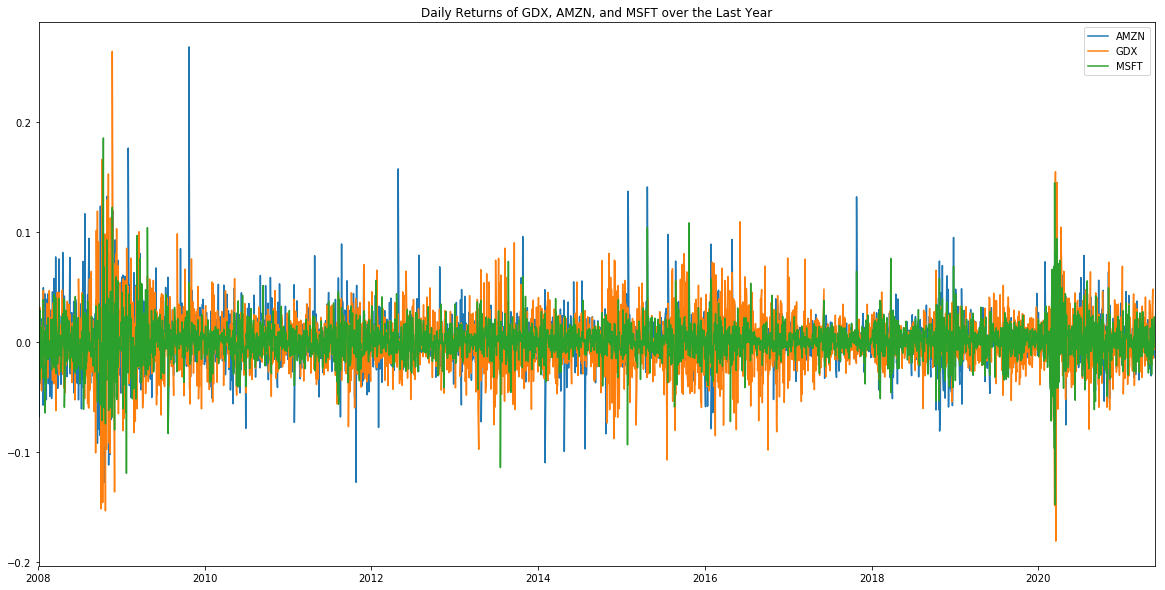

In [37]:
# Plot daily returns
df_daily_returns.plot(figsize=(20,10), title="Daily Returns of GDX, AMZN, and MSFT over the Last Year")

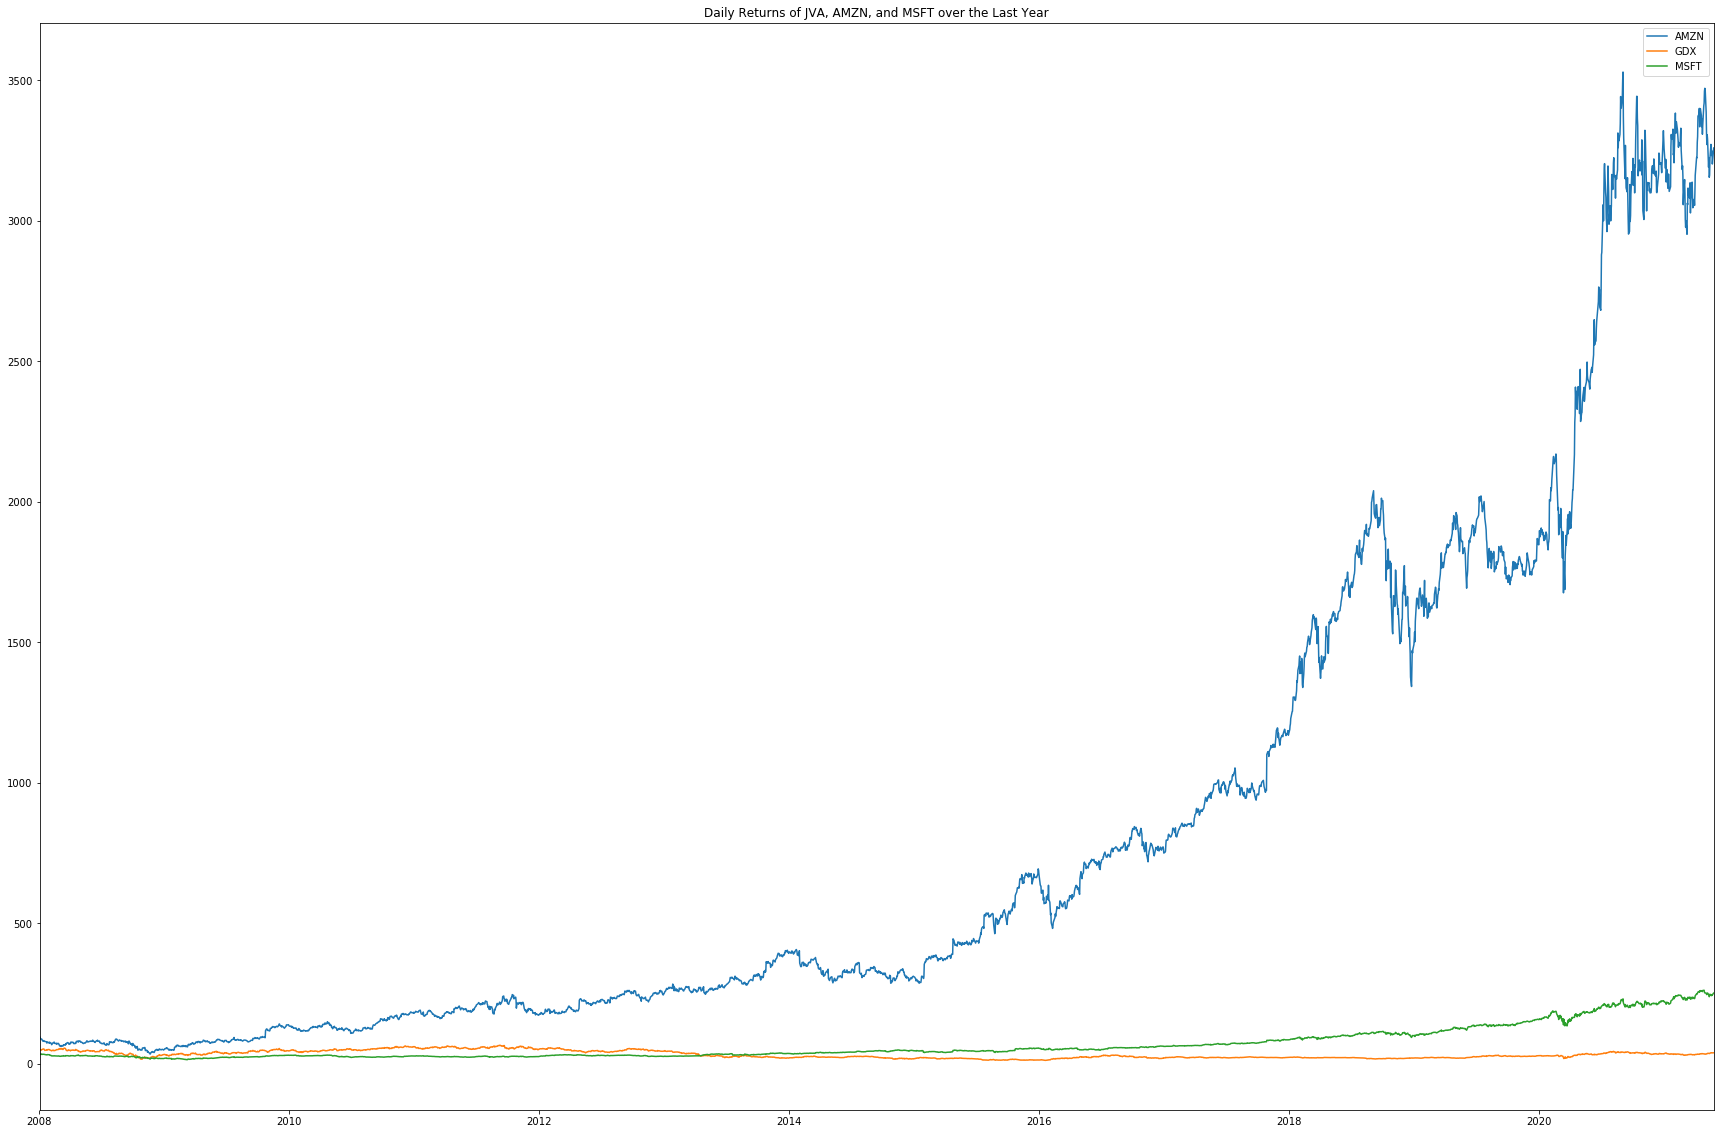

In [38]:
df_closing_prices.plot(figsize=(30,20), title="Daily Returns of JVA, AMZN, and MSFT over the Last Year")

In [39]:
df_daily_returns.to_csv(r'csv1.csv')

In [40]:
btc_csv = Path('btc.csv')
btc = pd.read_csv(
    btc_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
btc = btc.sort_index()
btc.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-06-01,"36,687.6","37,294.3","37,850.3","35,742.7",113.48K,-1.64%
2021-06-02,"37,555.8","36,687.7","38,199.9","35,981.1",96.89K,2.37%
2021-06-03,"39,187.3","37,555.7","39,462.3","37,193.6",106.44K,4.34%
2021-06-04,"36,851.3","39,191.4","39,255.4","35,659.9",127.71K,-5.96%
2021-06-05,"36,128.1","36,841.2","37,887.6","35,407.7",85.09K,-1.96%


In [41]:
# Create btc closing price column
btc_close = pd.DataFrame()

btc_close["BTC"] = btc["Price"]

# Set index
btc_close.index = btc_close.index.date

# Display table
btc_close.tail()

,BTC
2021-06-01,"36,687.6"
2021-06-02,"37,555.8"
2021-06-03,"39,187.3"
2021-06-04,"36,851.3"
2021-06-05,"36,128.1"


In [47]:
df_daily_returns.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)